<a href="https://colab.research.google.com/github/sasidharswarangi/Crowd-Counting/blob/master/MNIST_hand_written_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


### Tuning parameters

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
batch_size = 128
num_classes = 10
epochs = 5

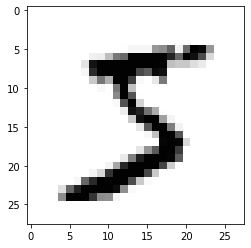

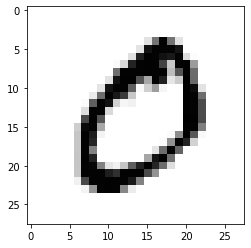

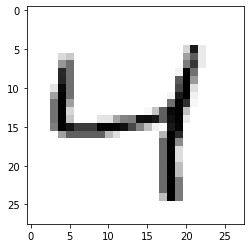

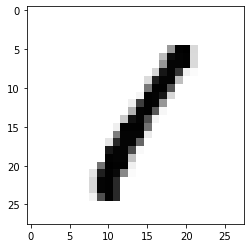

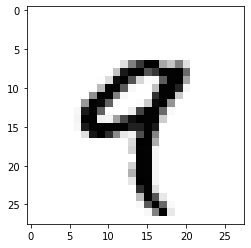

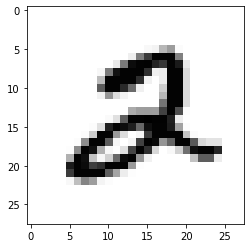

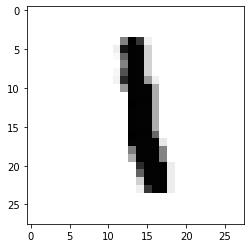

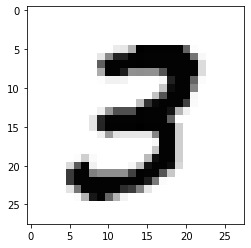

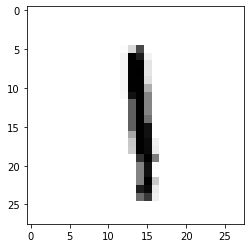

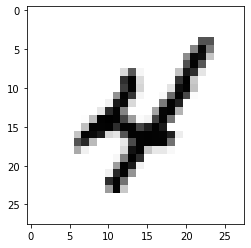

In [ ]:
for i in range(0,10):
  plt.imshow(x_train[i].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()

### Input image dimensions

In [ ]:
img_rows, img_cols = 28, 28

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [ ]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

### Reshaping the data

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Applying One hot encoding for the data
    One hot encoding basically is this,
For example you have digits 0 to 9 in your data and every image corresponds to a digit such as 3
In order to make this data understandable by the neural network we need to convert our 3 to one hot encoding which is,
One Hot : 	[0 0 0 1 0 0 0 0 0 0]
Normal :	[0 1 2 3 4 5 6 7 8 9]

In [ ]:
# One hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Creating the actual NN

In [ ]:
model = Sequential()

In [ ]:
import tensorflow as tf 

### adding layers to the NN

In [ ]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation=Activation(tf.nn.softmax)))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


### compiling the model

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
metrics=['accuracy'])

### training the model

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 365s 6ms/step - loss: 0.2375 - acc: 0.9259 - val_loss: 0.0450 - val_acc: 0.9847
Epoch 2/5
60000/60000 [==============================] - 364s 6ms/step - loss: 0.0750 - acc: 0.9776 - val_loss: 0.0327 - val_acc: 0.9879
Epoch 3/5
60000/60000 [==============================] - 363s 6ms/step - loss: 0.0585 - acc: 0.9824 - val_loss: 0.0288 - val_acc: 0.9899
Epoch 4/5
60000/60000 [==============================] - 364s 6ms/step - loss: 0.0470 - acc: 0.9862 - val_loss: 0.0254 - val_acc: 0.9905
Epoch 5/5
60000/60000 [==============================] - 365s 6ms/step - loss: 0.0396 - acc: 0.9880 - val_loss: 0.0243 - val_acc: 0.9911


### evaulating result

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.024344487878857762
Test accuracy: 0.9911
